In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data =pd.read_csv('/content/drive/MyDrive/employee_data (1) 2.csv')
data.head

<bound method NDFrame.head of        avg_monthly_hrs   department  filed_complaint  last_evaluation  \
0                  221  engineering              NaN         0.932868   
1                  232      support              NaN              NaN   
2                  184        sales              NaN         0.788830   
3                  206        sales              NaN         0.575688   
4                  249        sales              NaN         0.845217   
...                ...          ...              ...              ...   
14244              178           IT              NaN         0.735865   
14245              257        sales              NaN         0.638604   
14246              232      finance              1.0         0.847623   
14247              130           IT              NaN         0.757184   
14248              159          NaN              NaN         0.578742   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  
0             

In [ ]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [ ]:
data.shape

(14249, 10)

In [ ]:
data.nunique()

avg_monthly_hrs        249
department              12
filed_complaint          1
last_evaluation      12359
n_projects               7
recently_promoted        1
salary                   3
satisfaction         13710
status                   2
tenure                   8
dtype: int64

In [ ]:
data.nunique().sum()
data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [ ]:
#dropping the columns with large values
data['department'].fillna(data['department'].mode , inplace =True)
data['filed_complaint'].fillna("no complaint",inplace=True)#assuming that there are no complaints filed by
data['last_evaluation'].fillna(data['last_evaluation'].mean , inplace =True)
data['recently_promoted'].fillna("no promotion",inplace=True)
data['tenure'].fillna(data['tenure'].mean , inplace =True)
data['satisfaction'].fillna(data['satisfaction'].mean , inplace =True)
data['n_projects'].fillna(data['n_projects'].mean ,inplace=True)

data.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

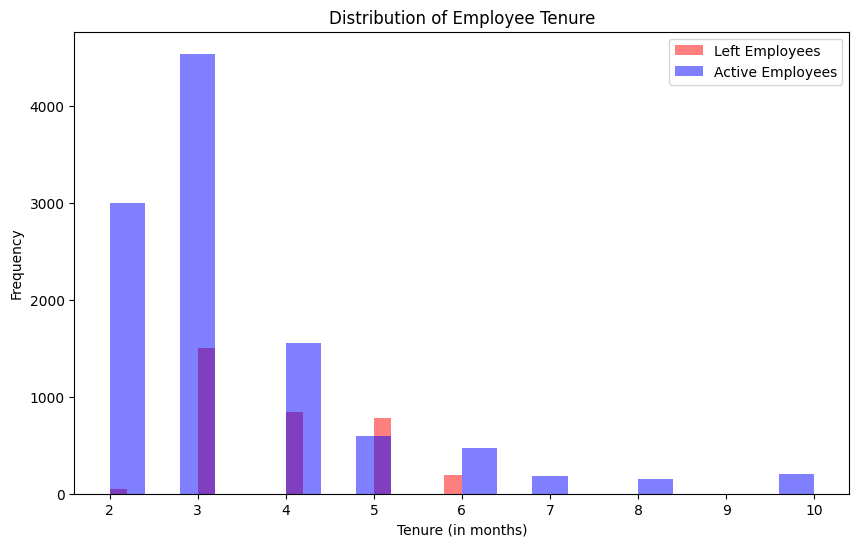

In [ ]:

# Filter the dataset for employees who have left and those who are still employed
data['tenure'] = pd.to_numeric(data['tenure'], errors='coerce')
left_employees = data[data['status'] == 'Left']
active_employees = data[data['status'] == 'Employed']
plt.figure(figsize=(10, 6))
plt.hist(left_employees['tenure'], bins=20, alpha=0.5, color='red', label='Left Employees')
plt.hist(active_employees['tenure'], bins=20, alpha=0.5, color='blue', label='Active Employees')
plt.xlabel('Tenure (in months)')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Tenure')
plt.legend()
plt.show()


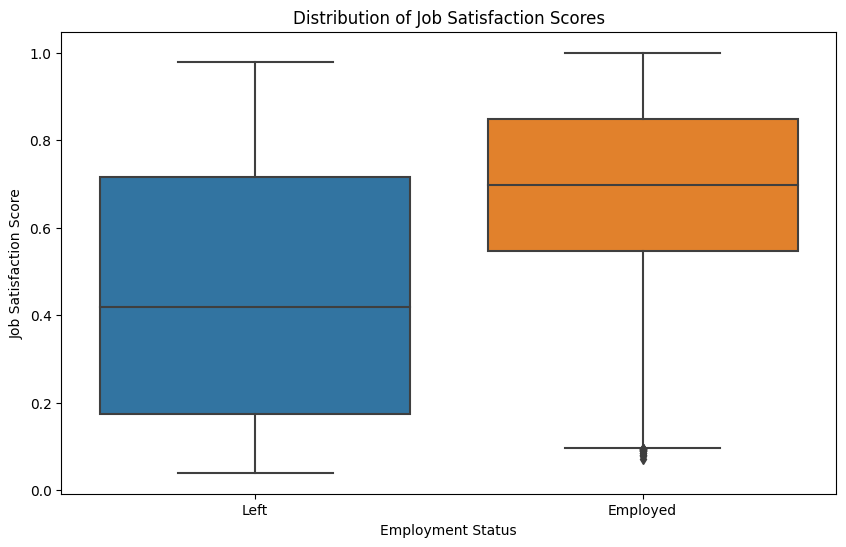

In [ ]:
#boxplot
data['satisfaction'] = pd.to_numeric(data['satisfaction'], errors='coerce')
left_employees = data[data['status'] == 'Left']
active_employees = data[data['status'] == 'Employed']
plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='satisfaction' ,data=pd.concat([left_employees , active_employees]))
plt.xlabel('Employment Status')
plt.ylabel('Job Satisfaction Score')
plt.title('Distribution of Job Satisfaction Scores')
plt.show()

In [ ]:
left_employee_count =data[data['status'] == 'Left'].shape[0]
tot_emp_count=data.shape[0]
tot_emp_count
lef_emp_per=(left_employee_count/tot_emp_count)*100
lef_emp_per

23.80517931082883

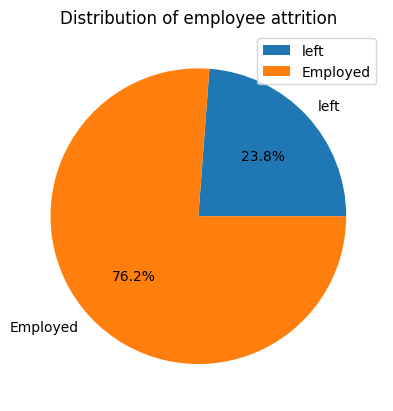

In [ ]:
labels=['left','Employed']
value=[lef_emp_per,100-lef_emp_per]
plt.pie(value,labels=labels,autopct="%1.1f%%")
plt.title('Distribution of employee attrition')
plt.legend()
plt.show()

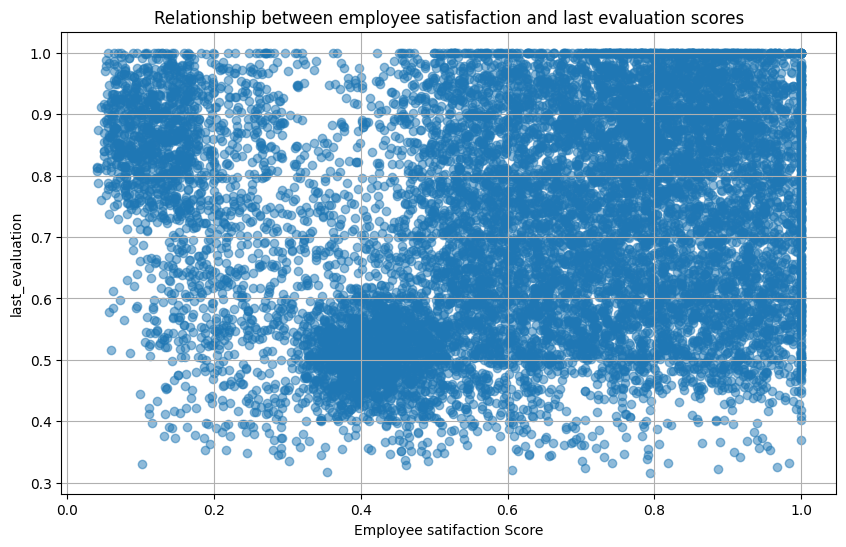

In [ ]:
#scatterplot to find the relation among satisfaction and last evaluation results
data['satisfaction'] = pd.to_numeric(data['satisfaction'], errors='coerce')
data['last_evaluation'] = pd.to_numeric(data['last_evaluation'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.scatter(data['satisfaction'],data['last_evaluation'],alpha=0.5)
plt.xlabel('Employee satifaction Score')
plt.ylabel('last_evaluation')
plt.title('Relationship between employee satisfaction and last evaluation scores')
plt.grid()
plt.show()

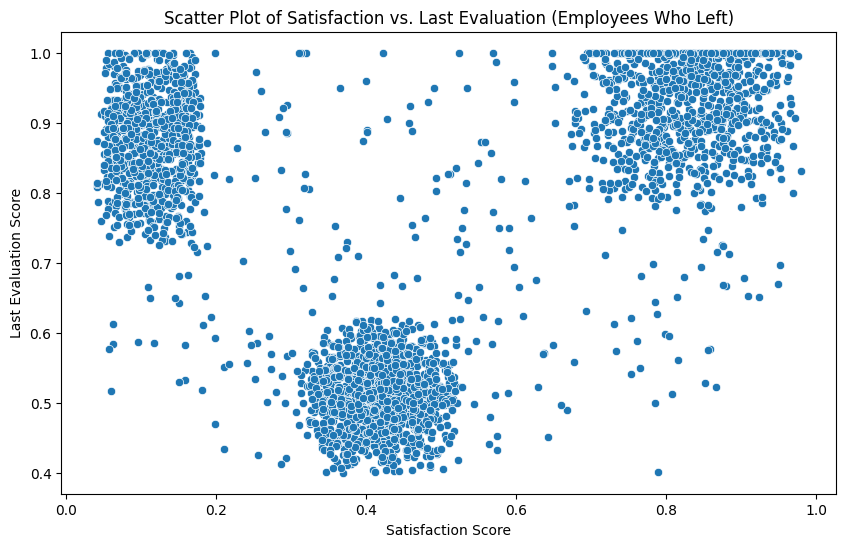

In [ ]:

data['last_evaluation'] = pd.to_numeric(data['last_evaluation'], errors='coerce')
data['satisfaction'] = pd.to_numeric(data['satisfaction'], errors='coerce')

# Filter data for employees who have left (status == 'Left')
left_employees = data[data['status'] == 'Left']
# Create a scatter plot to explore the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction', y='last_evaluation', data=left_employees)
plt.xlabel('Satisfaction Score')
plt.ylabel('Last Evaluation Score')
plt.title('Scatter Plot of Satisfaction vs. Last Evaluation (Employees Who Left)')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['satisfaction'])  # Features (all columns except 'status')
y = data['satisfaction']  # Target variable ('status' column)

# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

selected_features = ['tenure' ,'n_projects','satisfaction']
data['tenure'] = pd.to_numeric(data['tenure'], errors='coerce')
data['n_projects'] = pd.to_numeric(data['n_projects'], errors='coerce')
data.dropna(subset=selected_features + ['status'], inplace=True)
X = data[selected_features]
y = data['status']

# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Accuracy: 0.9375
Classification Report:
               precision    recall  f1-score   support

    Employed       0.96      0.96      0.96      1925
        Left       0.87      0.87      0.87       619

    accuracy                           0.94      2544
   macro avg       0.92      0.91      0.91      2544
weighted avg       0.94      0.94      0.94      2544



In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit both models on the training data
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

# Make predictions on the testing data for both models
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate the models' performance
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Decision Tree with Gini Impurity:")
print(f"Accuracy: {accuracy_gini}")
print("\nDecision Tree with Entropy:")
print(f"Accuracy: {accuracy_entropy}")

Decision Tree with Gini Impurity:
Accuracy: 0.9314143567874911

Decision Tree with Entropy:
Accuracy: 0.9314143567874911


In [ ]:
classification_rep_gini = classification_report(y_test, y_pred_gini)
classification_rep_entropy = classification_report(y_test, y_pred_entropy)
print("Classification Report:\n", classification_rep_gini)
print("Classification Report:\n", classification_rep_entropy)

Classification Report:
               precision    recall  f1-score   support

    Employed       0.95      0.96      0.96      2158
        Left       0.85      0.85      0.85       656

    accuracy                           0.93      2814
   macro avg       0.90      0.90      0.90      2814
weighted avg       0.93      0.93      0.93      2814

Classification Report:
               precision    recall  f1-score   support

    Employed       0.96      0.95      0.96      2158
        Left       0.85      0.86      0.85       656

    accuracy                           0.93      2814
   macro avg       0.90      0.91      0.90      2814
weighted avg       0.93      0.93      0.93      2814



<function matplotlib.pyplot.show(close=None, block=None)>

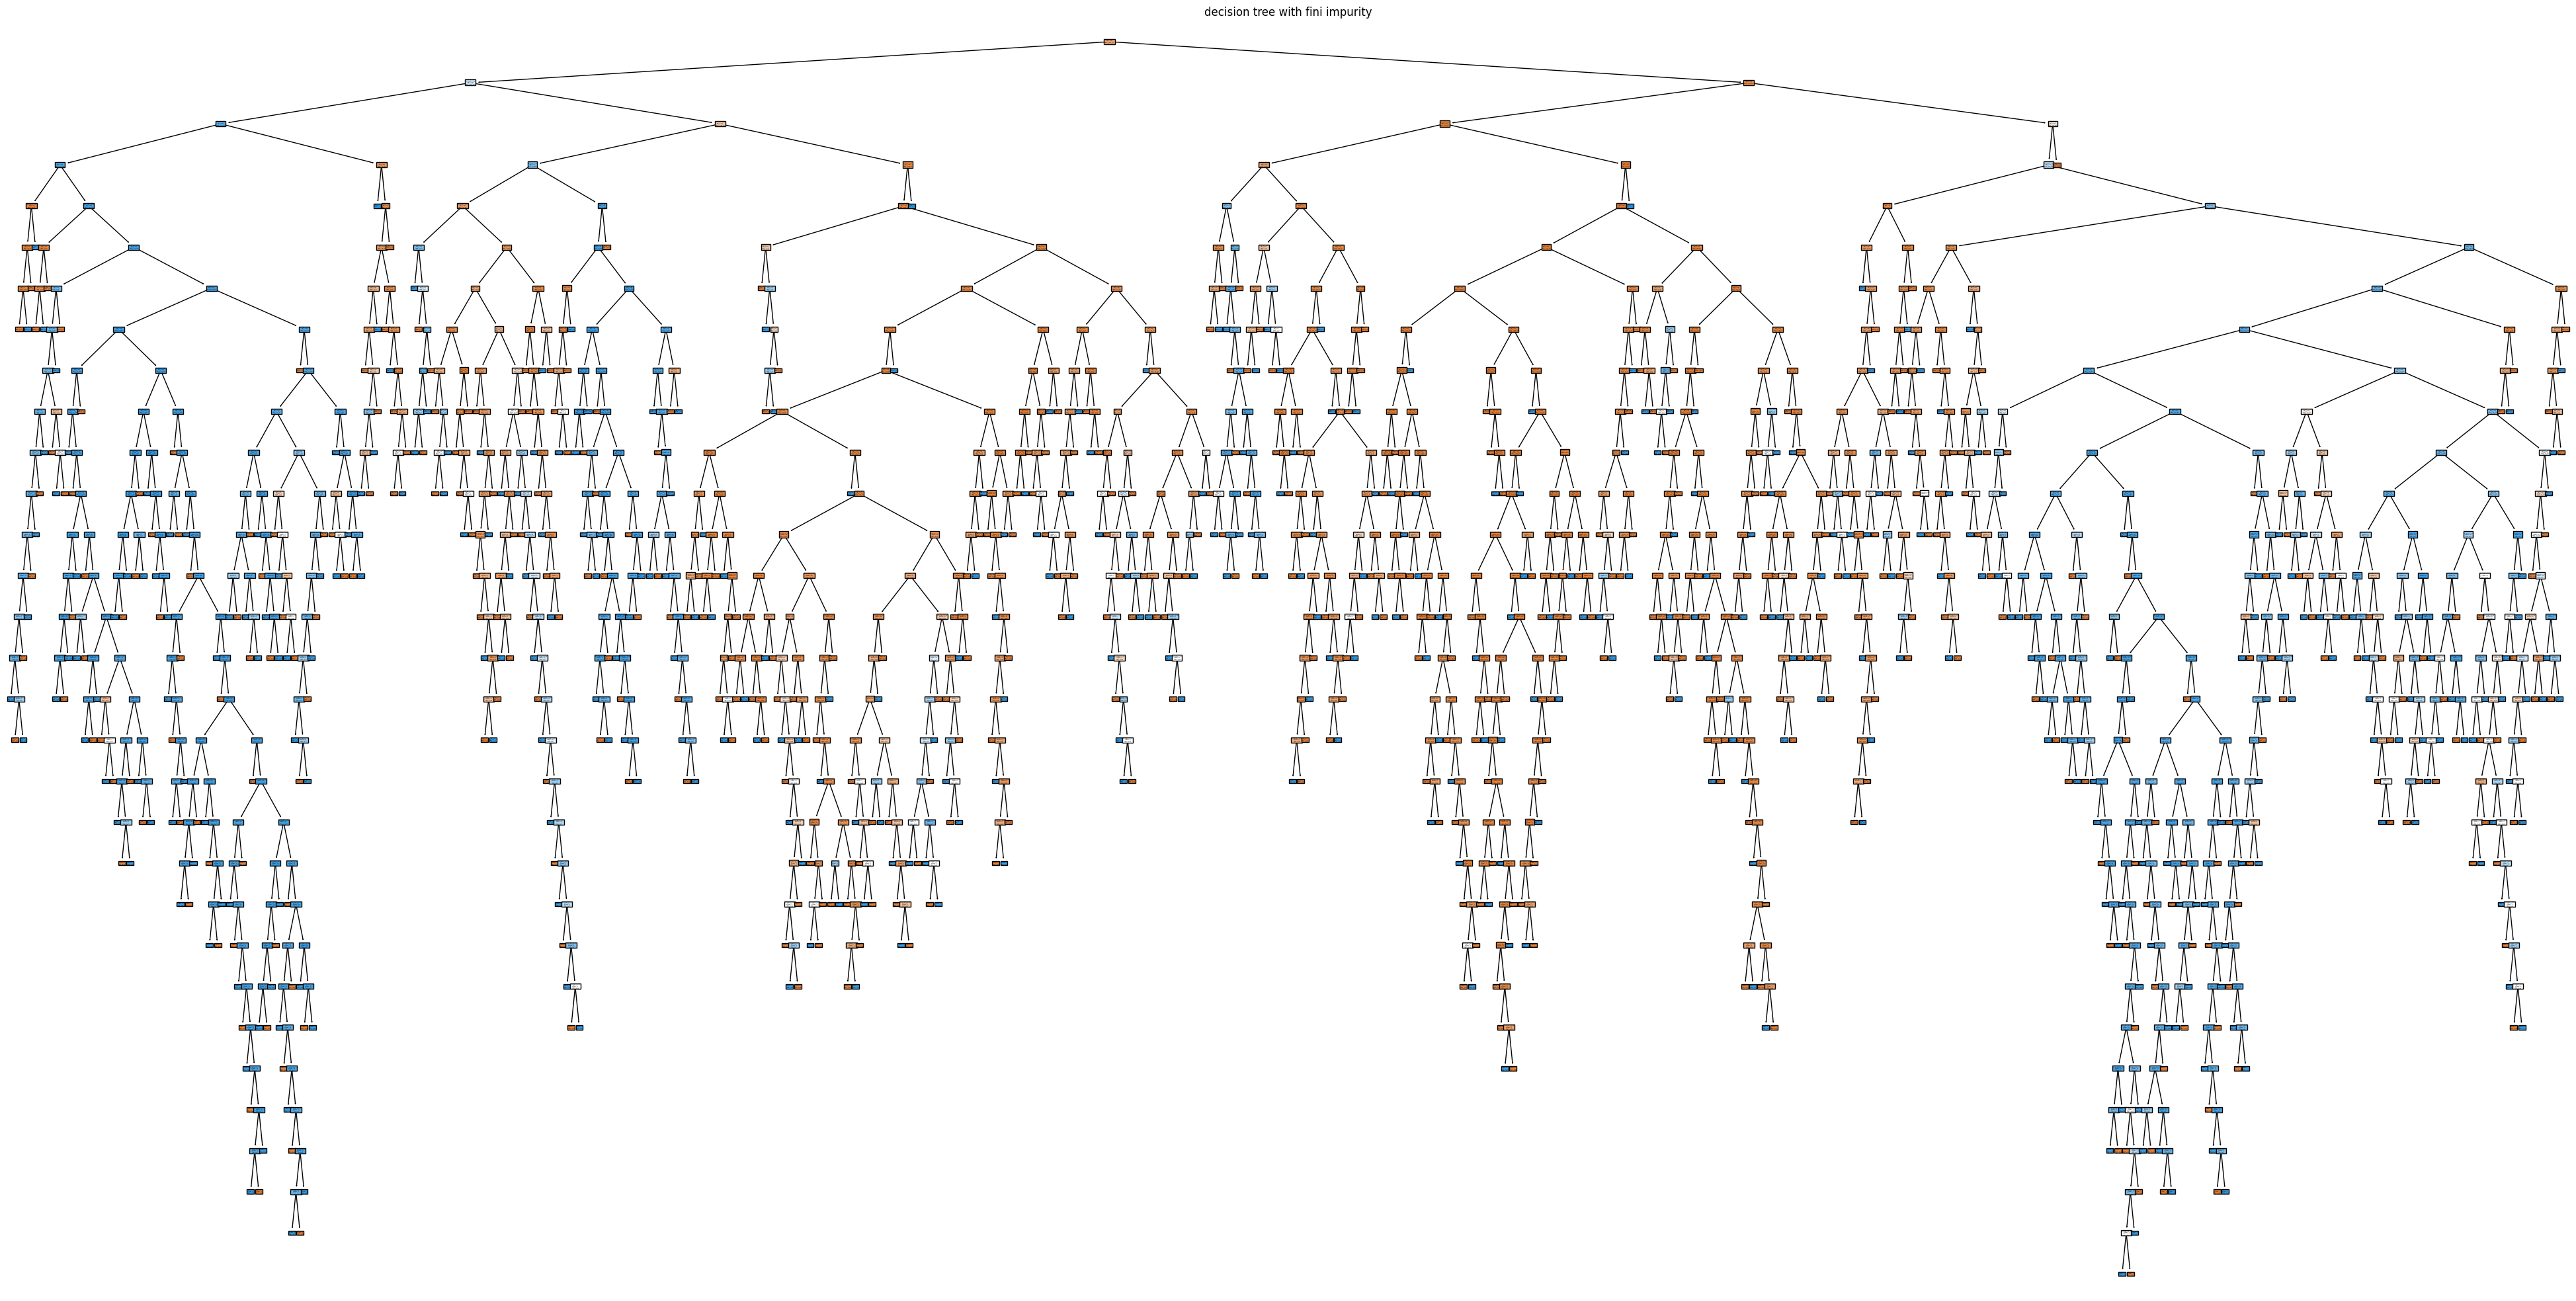

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,25))
plot_tree(clf_gini,feature_names=selected_features,class_names=['active','left'],filled=True)
plt.title('decision tree with fini impurity')
plt.show

In [ ]:
#finding the the depth of the tree
depth_g=clf_gini.get_depth()
depth_e=clf_entropy.get_depth()

print(f"descision tree depth:{depth_g}")
print(f"descision tree depth:{depth_e}")

descision tree depth:30
descision tree depth:36


Most Influential Features with Gini Impurity:
satisfaction: 0.5909
tenure: 0.2220
n_projects: 0.1871


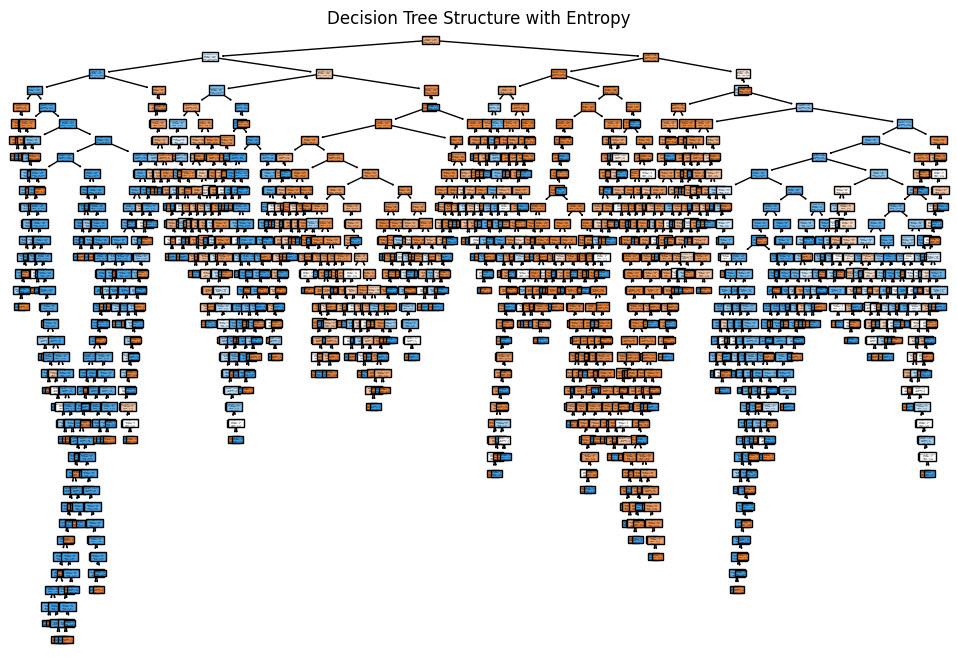

Decision Tree Depth with Entropy: 36
Most Influential Features with Entropy:
satisfaction: 0.5717
tenure: 0.2602
n_projects: 0.1681


In [ ]:
feature_importances_gini = clf_gini.feature_importances_
feature_names = selected_features

# Create a dictionary to pair feature names with their importances
feature_importance_dict_gini = dict(zip(feature_names, feature_importances_gini))

# Sort features by importance (descending order)
sorted_feature_importances_gini = sorted(feature_importance_dict_gini.items(), key=lambda x: x[1], reverse=True)

# Print the most influential features for Gini impurity
print("Most Influential Features with Gini Impurity:")
for feature, importance in sorted_feature_importances_gini:
    print(f"{feature}: {importance:.4f}")

# Visualize the decision tree structure for the model with entropy
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, feature_names=selected_features, class_names=['Active', 'Left'], filled=True)
plt.title('Decision Tree Structure with Entropy')
plt.show()

# Determine the depth of the tree with entropy
tree_depth_entropy = clf_entropy.get_depth()
print(f"Decision Tree Depth with Entropy: {tree_depth_entropy}")

# Calculate feature importances for the model with entropy
feature_importances_entropy = clf_entropy.feature_importances_

# Create a dictionary to pair feature names with their importances
feature_importance_dict_entropy = dict(zip(feature_names, feature_importances_entropy))

# Sort features by importance (descending order)
sorted_feature_importances_entropy = sorted(feature_importance_dict_entropy.items(), key=lambda x: x[1], reverse=True)

# Print the most influential features for entropy
print("Most Influential Features with Entropy:")
for feature, importance in sorted_feature_importances_entropy:
    print(f"{feature}: {importance:.4f}")

In [ ]:
#pruning based on min samples leaf and max samples leaf on gini
# Define a range of values for min_samples_leaf and max_depth
min_samples_leaf_values = [1, 5, 10, 20]
max_depth_values = [None, 5, 10, 15, 20]

# Initialize variables to store the best hyperparameters and model performance
best_accuracy = 0
best_min_samples_leaf = None
best_max_depth = None

for min_samples_leaf in min_samples_leaf_values:
    for max_depth in max_depth_values:
        # Create and train a Decision Tree Classifier with Gini impurity and pruning
        clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=min_samples_leaf, max_depth=max_depth, random_state=42)
        clf.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = clf.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Update best hyperparameters if this model has higher accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_min_samples_leaf = min_samples_leaf
            best_max_depth = max_depth

# Train the final model with the best hyperparameters
final_clf_gini = DecisionTreeClassifier(criterion='gini', min_samples_leaf=best_min_samples_leaf, max_depth=best_max_depth, random_state=42)
final_clf_gini.fit(X_train, y_train)

# Make predictions on the testing set using the final model
y_pred_gini = final_clf_gini.predict(X_test)

# Evaluate the final model
accuracy_gini = accuracy_score(y_test, y_pred_gini)


print("Best Hyperparameters for Gini Impurity:")
print(f"min_samples_leaf: {best_min_samples_leaf}")
print(f"max_depth: {best_max_depth}")
print("Final Model Performance with Gini Impurity:")
print(f"Accuracy: {accuracy_gini}")



Best Hyperparameters for Gini Impurity:
min_samples_leaf: 10
max_depth: 10
Final Model Performance with Gini Impurity:
Accuracy: 0.9633972992181947


In [ ]:
min_samples_leaf_values = [1, 5, 10, 20]
max_depth_values = [None, 5, 10, 15, 20]

# Initialize variables to store the best hyperparameters and model performance for entropy
best_accuracy_entropy = 0
best_min_samples_leaf_entropy = None
best_max_depth_entropy = None

for min_samples_leaf in min_samples_leaf_values:
    for max_depth in max_depth_values:
        # Create and train a Decision Tree Classifier with entropy and pruning
        clf_entropy = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, max_depth=max_depth, random_state=42)
        clf_entropy.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred_entropy = clf_entropy.predict(X_test)

        # Calculate accuracy
        accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

        # Update best hyperparameters if this model has higher accuracy
        if accuracy_entropy > best_accuracy_entropy:
            best_accuracy_entropy = accuracy_entropy
            best_min_samples_leaf_entropy = min_samples_leaf
            best_max_depth_entropy = max_depth

# Train the final model with the best hyperparameters for entropy
final_clf_entropy = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=best_min_samples_leaf_entropy, max_depth=best_max_depth_entropy, random_state=42)
final_clf_entropy.fit(X_train, y_train)

# Make predictions on the testing set using the final model for entropy
y_pred_entropy = final_clf_entropy.predict(X_test)

# Evaluate the final model for entropy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print("\nBest Hyperparameters for Entropy:")
print(f"min_samples_leaf: {best_min_samples_leaf_entropy}")
print(f"max_depth: {best_max_depth_entropy}")
print("Final Model Performance with Entropy:")
print(f"Accuracy: {accuracy_entropy}")



Best Hyperparameters for Entropy:
min_samples_leaf: 10
max_depth: 10
Final Model Performance with Entropy:
Accuracy: 0.9623312011371713


In [ ]:
#model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_gini=final_clf_gini.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini, pos_label='Left')
recall_gini = recall_score(y_test, y_pred_gini, pos_label='Left')
f1_score_gini = f1_score(y_test, y_pred_gini, pos_label='Left')

print("Performance Metrics for Gini Impurity:")
print(f"Accuracy: {accuracy_gini:.4f}")
print(f"Precision: {precision_gini:.4f}")
print(f"Recall: {recall_gini:.4f}")
print(f"F1 Score: {f1_score_gini:.4f}")

# Evaluate the final model with entropy
y_pred_entropy = final_clf_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy, pos_label='Left')
recall_entropy = recall_score(y_test, y_pred_entropy, pos_label='Left')
f1_score_entropy = f1_score(y_test, y_pred_entropy, pos_label='Left')

print("\nPerformance Metrics for Entropy:")
print(f"Accuracy: {accuracy_entropy:.4f}")
print(f"Precision: {precision_entropy:.4f}")
print(f"Recall: {recall_entropy:.4f}")
print(f"F1 Score: {f1_score_entropy:.4f}")


Performance Metrics for Gini Impurity:
Accuracy: 0.9634
Precision: 0.9368
Recall: 0.9040
F1 Score: 0.9201

Performance Metrics for Entropy:
Accuracy: 0.9623
Precision: 0.9351
Recall: 0.9009
F1 Score: 0.9177


diverging bar chart to display the confusion matrix, showing true positives, true
negatives, false positives, and false negatives for both criteria.

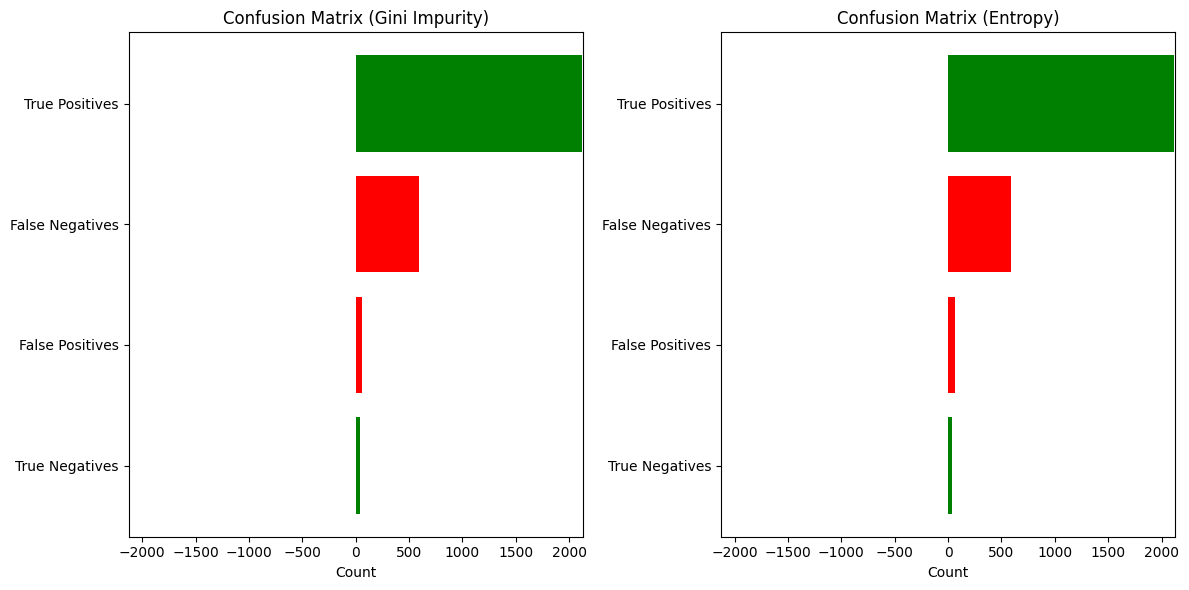

In [ ]:
from sklearn.metrics import confusion_matrix
# Define the confusion matrix values for Gini impurity and entropy models
confusion_matrix_gini = confusion_matrix(y_test, y_pred_gini)
confusion_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)

# Extract TP, TN, FP, FN values
tp_gini, tn_gini, fp_gini, fn_gini = confusion_matrix_gini.ravel()
tp_entropy, tn_entropy, fp_entropy, fn_entropy = confusion_matrix_entropy.ravel()

# Create a diverging bar chart
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gini impurity model
labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
values = [tn_gini, fp_gini, fn_gini, tp_gini]
colors = ['green', 'red', 'red', 'green']

ax[0].barh(labels, values, color=colors)
ax[0].set_xlim(-max(values) - 10, max(values) + 10)
ax[0].set_title('Confusion Matrix (Gini Impurity)')
ax[0].set_xlabel('Count')

# Entropy model
values = [tn_entropy, fp_entropy, fn_entropy, tp_entropy]

ax[1].barh(labels, values, color=colors)
ax[1].set_xlim(-max(values) - 10, max(values) + 10)
ax[1].set_title('Confusion Matrix (Entropy)')
ax[1].set_xlabel('Count')

plt.tight_layout()
plt.show()


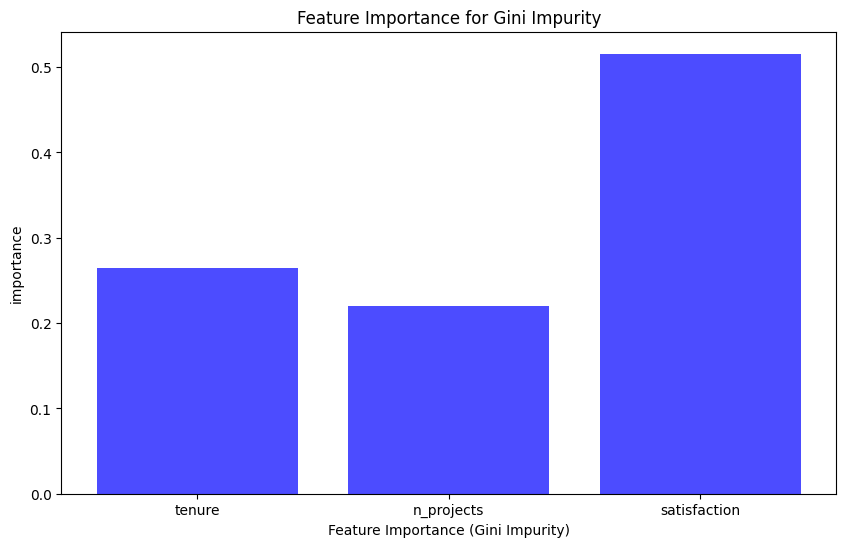

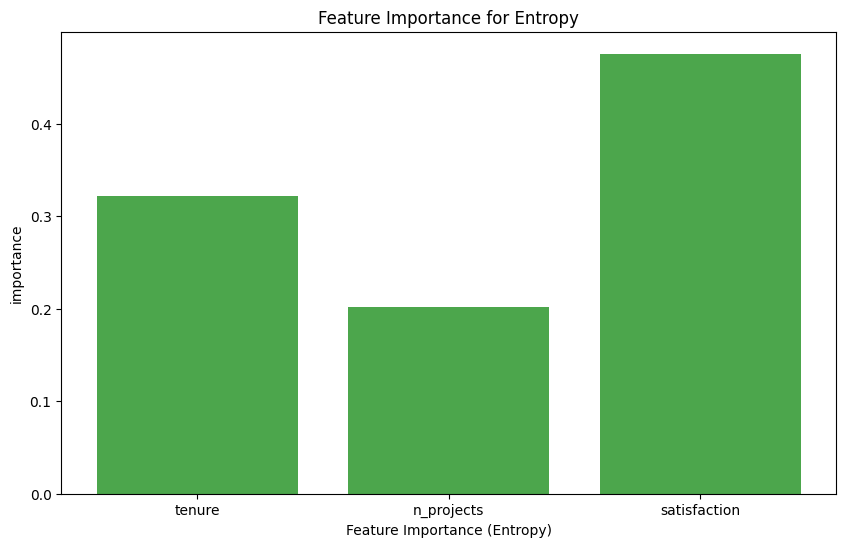

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'final_clf_gini' and 'final_clf_entropy' are your trained pruned decision tree models

# Get feature importances for both Gini impurity and entropy models
feature_importances_gini = final_clf_gini.feature_importances_
feature_importances_entropy = final_clf_entropy.feature_importances_

# Get feature names
feature_names = selected_features

# Create a bar chart to visualize feature importances for Gini impurity
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances_gini, color='b', alpha=0.7)
plt.xlabel('Feature Importance (Gini Impurity)')
plt.ylabel('importance')

plt.title('Feature Importance for Gini Impurity')

plt.show()

# Create a bar chart to visualize feature importances for entropy
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances_entropy, color='g', alpha=0.7)
plt.xlabel('Feature Importance (Entropy)')
plt.ylabel('importance')
plt.title('Feature Importance for Entropy')

plt.show()


in the above bar chart showing the importance of predicting the attrition under both both gini and entropy we see that we obtain 96% accuracy in gini inpurity with max depth having the best employee attrition